# Assessment de Inteligência Artificial: Classificação

## Análise de Dataset de Diamantes

## 1. Carregamento e Preparação dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Carregamento do dataset

In [2]:
url = 'https://raw.githubusercontent.com/cassiusf/datasets/main/diamonds.csv'
df = pd.read_csv(url)

print(f"Dimensões do dataset: {df.shape}")
print(f"\nPrimeiras linhas:")
df.head()

Dimensões do dataset: (35342, 10)

Primeiras linhas:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
4,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33


### 1.a Transformar clarity e color em variáveis dummy

In [3]:
df_dummies = pd.get_dummies(df, columns=['clarity', 'color'], drop_first=True)
print(f"Novas dimensões após criar dummies: {df_dummies.shape}")
print(f"\nColunas do dataset:")
print(df_dummies.columns.tolist())

Novas dimensões após criar dummies: (35342, 21)

Colunas do dataset:
['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']


### 1.b Visualizar distribuição da variável-alvo (cut)

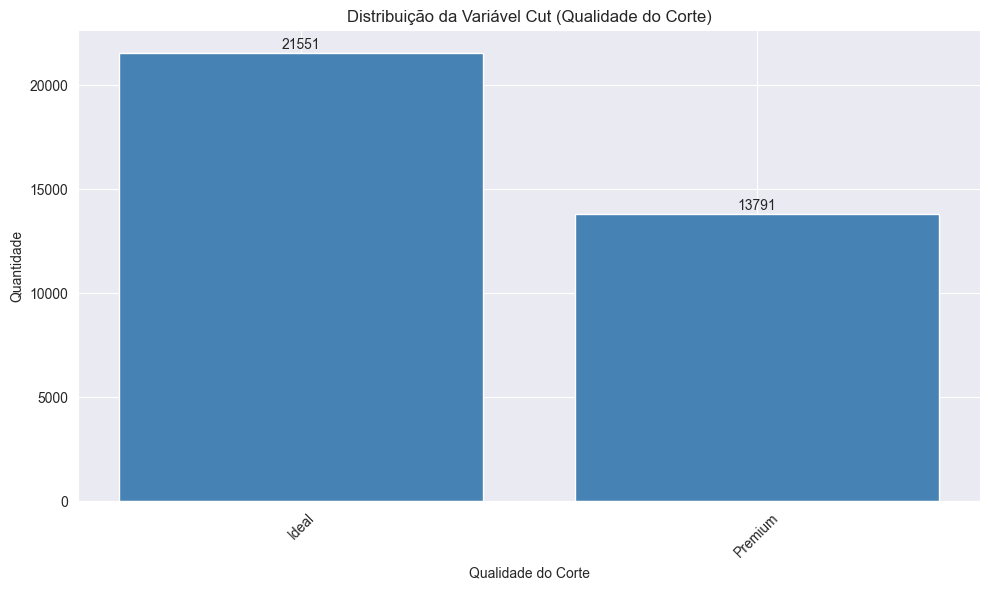

Distribuição percentual:
cut
Ideal      60.978439
Premium    39.021561
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(10, 6))
cut_counts = df_dummies['cut'].value_counts()
plt.bar(cut_counts.index, cut_counts.values, color='steelblue')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Quantidade')
plt.title('Distribuição da Variável Cut (Qualidade do Corte)')
plt.xticks(rotation=45)

for i, v in enumerate(cut_counts.values):
    plt.text(i, v + 200, str(v), ha='center')

plt.tight_layout()
plt.show()

print("Distribuição percentual:")
print(df_dummies['cut'].value_counts(normalize=True) * 100)

### 1.c Recodificar a variável alvo


In [5]:
cut_mapping = {
    'Ideal': 0,
    'Premium': 1
}

df_dummies['cut'] = df_dummies['cut'].map(cut_mapping)
print("Valores únicos após recodificação:")
print(df_dummies['cut'].unique())
print("\nDistribuição após recodificação:")
print(df_dummies['cut'].value_counts().sort_index())

Valores únicos após recodificação:
[0 1]

Distribuição após recodificação:
cut
0    21551
1    13791
Name: count, dtype: int64


## 2. Separação de Variáveis

In [6]:
X = df_dummies.drop('cut', axis=1)
y = df_dummies['cut']

print(f"Dimensões de X: {X.shape}")
print(f"Dimensões de y: {y.shape}")

Dimensões de X: (35342, 20)
Dimensões de y: (35342,)


## 3. Escalonamento dos Dados

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados escalonados com StandardScaler")
print(f"Média das features após escalonamento: {np.mean(X_scaled, axis=0).mean():.6f}")
print(f"Desvio padrão das features após escalonamento: {np.std(X_scaled, axis=0).mean():.6f}")

Dados escalonados com StandardScaler
Média das features após escalonamento: 0.000000
Desvio padrão das features após escalonamento: 1.000000


## 4. Separação em Treino e Teste (75-25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"\nProporção de treino: {len(X_train)/len(X_scaled)*100:.1f}%")
print(f"Proporção de teste: {len(X_test)/len(X_scaled)*100:.1f}%")

Tamanho do conjunto de treino: (26506, 20)
Tamanho do conjunto de teste: (8836, 20)

Proporção de treino: 75.0%
Proporção de teste: 25.0%


## 5. Modelo de Árvore de Decisão

### 5.1 Treinamento e Predição

In [9]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Árvore de Decisão treinada com sucesso!")

Árvore de Decisão treinada com sucesso!


### 5.2 Matriz de Confusão

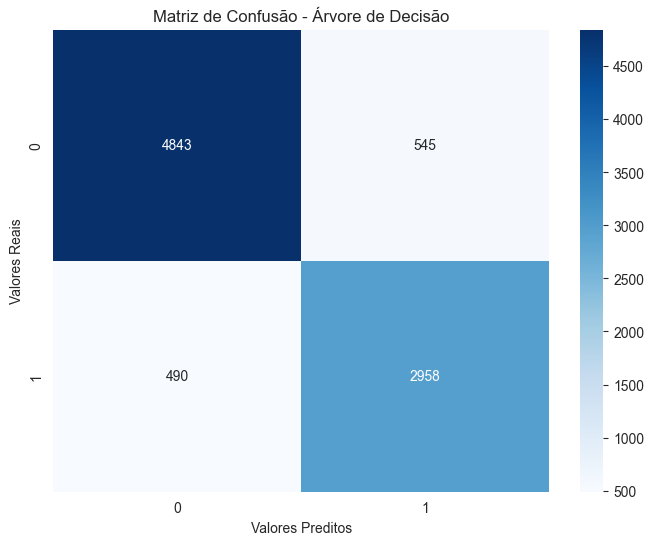


Matriz de Confusão:
[[4843  545]
 [ 490 2958]]


In [10]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

print("\nMatriz de Confusão:")
print(cm_dt)

### 5.3 Relatório de Classificação

In [11]:
print("Relatório de Classificação - Árvore de Decisão\n")
print(classification_report(y_test, y_pred_dt))

Relatório de Classificação - Árvore de Decisão

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5388
           1       0.84      0.86      0.85      3448

    accuracy                           0.88      8836
   macro avg       0.88      0.88      0.88      8836
weighted avg       0.88      0.88      0.88      8836



## 6. Random Forest - Modelo Padrão

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Relatório de Classificação - Random Forest (Padrão)\n")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest (Padrão)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5388
           1       0.91      0.88      0.90      3448

    accuracy                           0.92      8836
   macro avg       0.92      0.91      0.92      8836
weighted avg       0.92      0.92      0.92      8836



## 7. GridSearch - Random Forest

### Justificativa dos parâmetros escolhidos:
- **n_estimators**: Número de árvores na floresta - mais árvores geralmente melhoram a performance
- **max_depth**: Profundidade máxima das árvores - controla overfitting
- **min_samples_split**: Mínimo de amostras para dividir um nó - evita divisões muito específicas

In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

print("Executando GridSearch...")
grid_search.fit(X_train, y_train)

print(f"\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)
print(f"\nMelhor score de validação cruzada: {grid_search.best_score_:.4f}")

Executando GridSearch...

Melhores parâmetros encontrados:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Melhor score de validação cruzada: 0.9210


### Executando modelo com melhores parâmetros

In [14]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Relatório de Classificação - Random Forest (GridSearch)\n")
print(classification_report(y_test, y_pred_best_rf))

Relatório de Classificação - Random Forest (GridSearch)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5388
           1       0.91      0.88      0.90      3448

    accuracy                           0.92      8836
   macro avg       0.92      0.91      0.92      8836
weighted avg       0.92      0.92      0.92      8836



## 8. XGBoost

In [15]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("Relatório de Classificação - XGBoost\n")
print(classification_report(y_test, y_pred_xgb))

Relatório de Classificação - XGBoost

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5388
           1       0.91      0.88      0.89      3448

    accuracy                           0.92      8836
   macro avg       0.92      0.91      0.91      8836
weighted avg       0.92      0.92      0.92      8836



## 9. SVM (Support Vector Machine)

In [16]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Relatório de Classificação - SVM\n")
print(classification_report(y_test, y_pred_svm))

Relatório de Classificação - SVM

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5388
           1       0.91      0.87      0.89      3448

    accuracy                           0.92      8836
   macro avg       0.91      0.91      0.91      8836
weighted avg       0.92      0.92      0.92      8836



## Comparação Final dos Modelos

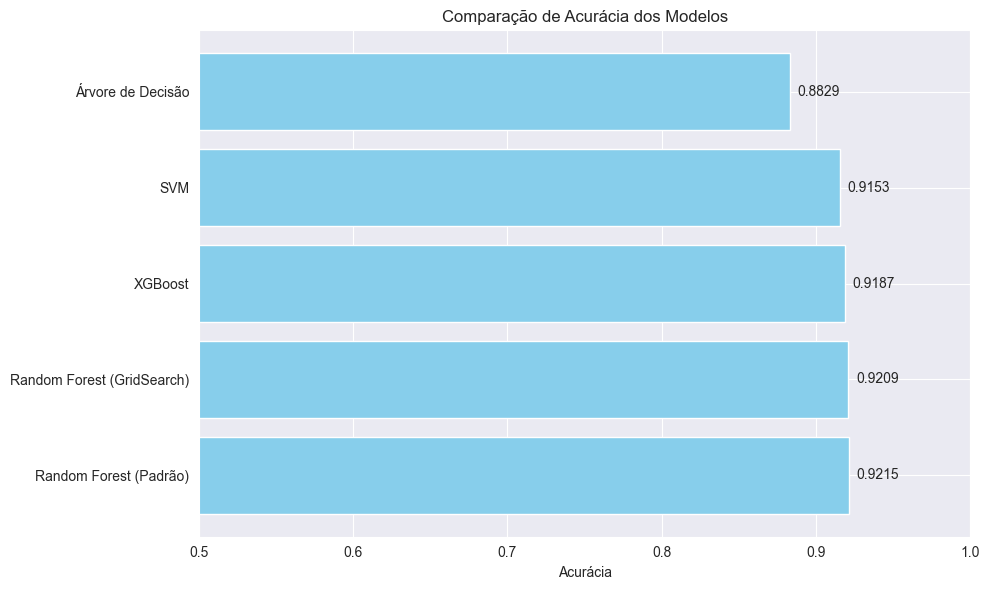


Ranking de Acurácia dos Modelos:
                    Modelo  Acurácia
    Random Forest (Padrão)  0.921458
Random Forest (GridSearch)  0.920892
                   XGBoost  0.918742
                       SVM  0.915346
         Árvore de Decisão  0.882866


In [17]:
from sklearn.metrics import accuracy_score

models_results = {
    'Árvore de Decisão': accuracy_score(y_test, y_pred_dt),
    'Random Forest (Padrão)': accuracy_score(y_test, y_pred_rf),
    'Random Forest (GridSearch)': accuracy_score(y_test, y_pred_best_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

results_df = pd.DataFrame(list(models_results.items()), columns=['Modelo', 'Acurácia'])
results_df = results_df.sort_values('Acurácia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(results_df['Modelo'], results_df['Acurácia'], color='skyblue')
plt.xlabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.xlim([0.5, 1.0])

for i, v in enumerate(results_df['Acurácia']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

print("\nRanking de Acurácia dos Modelos:")
print(results_df.to_string(index=False))

## 10. GridSearch - SVM

### Questão 8: GridSearch para otimização de parâmetros C e kernel

In [18]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_grid = SVC(random_state=42)
grid_search_svm = GridSearchCV(
    svm_grid, 
    param_grid_svm, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

print("Executando GridSearch para SVM...")
grid_search_svm.fit(X_train, y_train)

print(f"\nMelhores parâmetros encontrados:")
print(grid_search_svm.best_params_)
print(f"\nMelhor score de validação cruzada: {grid_search_svm.best_score_:.4f}")

Executando GridSearch para SVM...

Melhores parâmetros encontrados:
{'C': 0.1, 'kernel': 'linear'}

Melhor score de validação cruzada: 0.9179


### Questões 9 e 10: Executar melhor modelo SVM e apresentar relatório

In [19]:
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print("Relatório de Classificação - SVM (GridSearch)\n")
print(classification_report(y_test, y_pred_best_svm))

Relatório de Classificação - SVM (GridSearch)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5388
           1       0.91      0.88      0.89      3448

    accuracy                           0.92      8836
   macro avg       0.91      0.91      0.91      8836
weighted avg       0.92      0.92      0.92      8836



## 11. Feature Importance

### Questão 11: Visualização da importância das variáveis no Random Forest

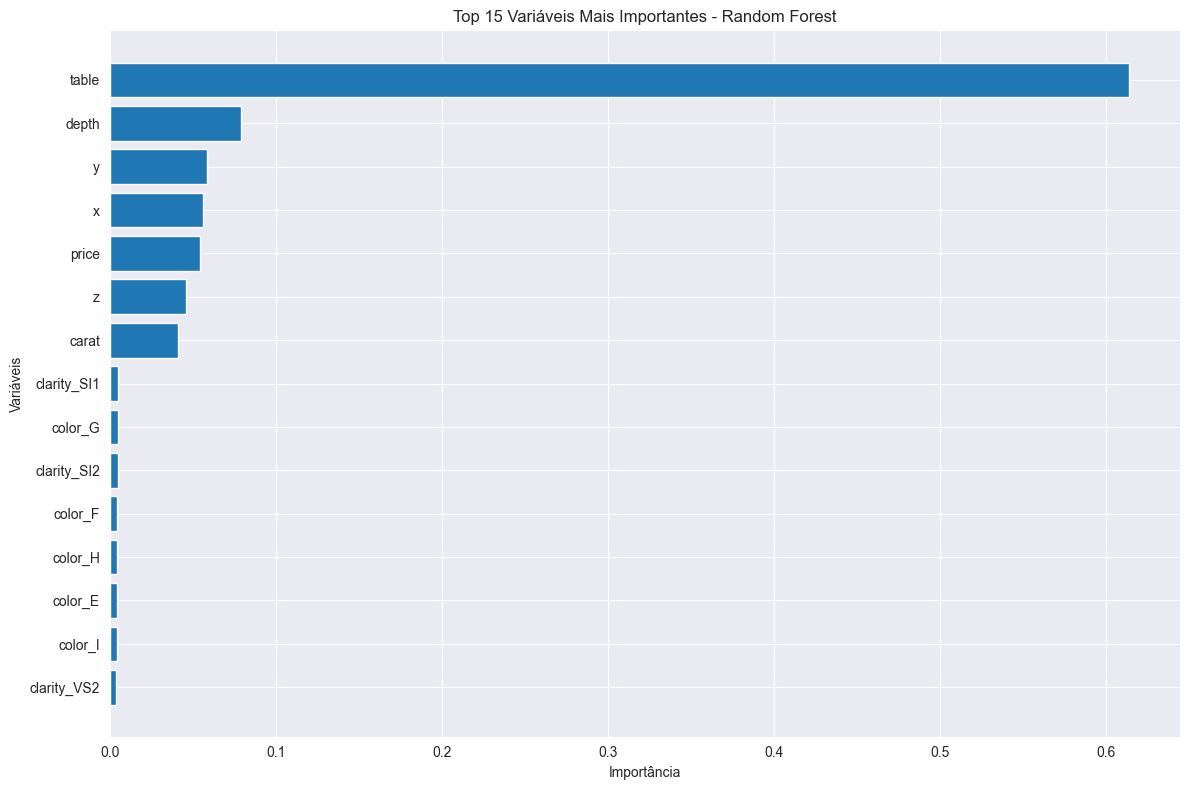

Importância das variáveis (todas):
         feature  importance
2          table    0.614075
1          depth    0.079218
5              y    0.058646
4              x    0.056069
3          price    0.054603
6              z    0.045707
0          carat    0.040958
8    clarity_SI1    0.005019
16       color_G    0.004864
9    clarity_SI2    0.004838
15       color_F    0.004558
17       color_H    0.004408
14       color_E    0.004390
18       color_I    0.004332
11   clarity_VS2    0.003924
10   clarity_VS1    0.003400
13  clarity_VVS2    0.003296
7     clarity_IF    0.002845
12  clarity_VVS1    0.002473
19       color_J    0.002378


In [20]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Top 15 Variáveis Mais Importantes - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Importância das variáveis (todas):")
print(feature_importance.to_string())

### Questão 12: Três variáveis mais relevantes

In [21]:
top_3 = feature_importance.head(3)
print("As 3 variáveis mais relevantes são:\n")
for i, row in top_3.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

print("\nJustificativa:")
print("Essas variáveis têm os maiores valores de importância calculados pelo Random Forest,")
print("indicando que são as que mais contribuem para a decisão de classificação entre")
print("diamantes Ideal e Premium. O algoritmo calcula isso baseado na redução de impureza")
print("que cada variável proporciona nas árvores de decisão.")

As 3 variáveis mais relevantes são:

table: 0.6141
depth: 0.0792
y: 0.0586

Justificativa:
Essas variáveis têm os maiores valores de importância calculados pelo Random Forest,
indicando que são as que mais contribuem para a decisão de classificação entre
diamantes Ideal e Premium. O algoritmo calcula isso baseado na redução de impureza
que cada variável proporciona nas árvores de decisão.


## 12. Análise LIME

### Questão 13: Aplicação da técnica LIME em duas observações

In [22]:
!pip install lime -q

import lime
import lime.lime_tabular

np.random.seed(42)
indices = np.random.choice(X_test.shape[0], 2, replace=False)

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=X.columns.tolist(),
    class_names=['Ideal', 'Premium'],
    mode='classification',
    random_state=42
)

print("Observações selecionadas aleatoriamente:")
print(f"Índices no conjunto de teste: {indices}")


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Observações selecionadas aleatoriamente:
Índices no conjunto de teste: [4043 5885]


#### Análise da primeira observação

In [23]:
i = indices[0]
exp1 = explainer.explain_instance(
    X_test[i], 
    best_rf.predict_proba, 
    num_features=10
)

print(f"Observação 1 - Classe real: {y_test.iloc[i]} ({['Ideal', 'Premium'][y_test.iloc[i]]})")
print(f"Predição do modelo: {best_rf.predict(X_test[i].reshape(1, -1))[0]} ({['Ideal', 'Premium'][best_rf.predict(X_test[i].reshape(1, -1))[0]]})")
print("\nExplicação LIME - Top 10 features:")

for feature, weight in exp1.as_list()[:10]:
    print(f"{feature}: {weight:.4f}")

Observação 1 - Classe real: 0 (Ideal)
Predição do modelo: 0 (Ideal)

Explicação LIME - Top 10 features:
table <= -0.54: -0.2636
-0.91 < x <= -0.16: -0.0905
-0.73 < price <= -0.42: 0.0593
depth <= -0.46: 0.0406
-0.83 < carat <= -0.33: -0.0387
-0.89 < y <= -0.15: 0.0358
clarity_VVS1 > -0.29: -0.0295
color_I <= -0.33: 0.0182
clarity_SI1 <= -0.53: -0.0140
-0.91 < z <= -0.17: -0.0138


#### Análise da segunda observação

In [24]:
i = indices[1]
exp2 = explainer.explain_instance(
    X_test[i], 
    best_rf.predict_proba, 
    num_features=10
)

print(f"Observação 2 - Classe real: {y_test.iloc[i]} ({['Ideal', 'Premium'][y_test.iloc[i]]})")
print(f"Predição do modelo: {best_rf.predict(X_test[i].reshape(1, -1))[0]} ({['Ideal', 'Premium'][best_rf.predict(X_test[i].reshape(1, -1))[0]]})")
print("\nExplicação LIME - Top 10 features:")

for feature, weight in exp2.as_list()[:10]:
    print(f"{feature}: {weight:.4f}")

Observação 2 - Classe real: 0 (Ideal)
Predição do modelo: 0 (Ideal)

Explicação LIME - Top 10 features:
table <= -0.54: -0.2710
x <= -0.91: -0.1180
y <= -0.89: 0.0919
price <= -0.73: 0.0597
carat <= -0.83: -0.0552
clarity_IF <= -0.21: 0.0374
-0.46 < depth <= 0.17: -0.0292
clarity_VVS1 <= -0.29: 0.0214
clarity_SI1 <= -0.53: -0.0209
z <= -0.91: 0.0150


### Questão 14: Interpretação dos resultados LIME

In [26]:
print("=== OBSERVAÇÃO 1 ===")
print("\nVariáveis da observação:")
for feat in X.columns[:10]:
    idx = X.columns.get_loc(feat)
    print(f"{feat}: {X_test[indices[0]][idx]:.4f}")

print("\nDois fatores que mais influenciaram a classificação:")
exp1_list = exp1.as_list()
print(f"1. {exp1_list[0][0]} - Peso: {exp1_list[0][1]:.4f}")
print(f"2. {exp1_list[1][0]} - Peso: {exp1_list[1][1]:.4f}")

print("\n=== OBSERVAÇÃO 2 ===")
print("\nVariáveis da observação:")
for feat in X.columns[:10]:
    idx = X.columns.get_loc(feat)
    print(f"{feat}: {X_test[indices[1]][idx]:.4f}")

print("\nDois fatores que mais influenciaram a classificação:")
exp2_list = exp2.as_list()
print(f"1. {exp2_list[0][0]} - Peso: {exp2_list[0][1]:.4f}")
print(f"2. {exp2_list[1][0]} - Peso: {exp2_list[1][1]:.4f}")

print("\n=== Analise ===")
print("O LIME mostra como cada variável contribuiu para a decisão do modelo.")
print("Valores positivos indicam contribuição para a classe Premium,")
print("enquanto valores negativos indicam contribuição para a classe Ideal.")
print("As variáveis com maior peso absoluto são as mais importantes para")
print("a decisão específica em cada observação individual.")

=== OBSERVAÇÃO 1 ===

Variáveis da observação:
carat: -0.8126
depth: -1.2068
table: -0.5448
price: -0.6686
x: -0.8173
y: -0.7750
z: -0.8849
clarity_IF: -0.2062
clarity_SI1: -0.5347
clarity_SI2: -0.4315

Dois fatores que mais influenciaram a classificação:
1. table <= -0.54 - Peso: -0.2636
2. -0.91 < x <= -0.16 - Peso: -0.0905

=== OBSERVAÇÃO 2 ===

Variáveis da observação:
carat: -0.9808
depth: -0.2506
table: -1.0677
price: -0.7461
x: -1.1866
y: -1.1258
z: -1.1859
clarity_IF: -0.2062
clarity_SI1: -0.5347
clarity_SI2: -0.4315

Dois fatores que mais influenciaram a classificação:
1. table <= -0.54 - Peso: -0.2710
2. x <= -0.91 - Peso: -0.1180

=== Analise ===
O LIME mostra como cada variável contribuiu para a decisão do modelo.
Valores positivos indicam contribuição para a classe Premium,
enquanto valores negativos indicam contribuição para a classe Ideal.
As variáveis com maior peso absoluto são as mais importantes para
a decisão específica em cada observação individual.
